<a href="https://colab.research.google.com/github/Bilpapster/Data-Mining-and-Visualizations-MRD/blob/main/MRD_Data_mining_and_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

print('Hello MRD!')

Hello MRD!


In [ ]:
applications_df = pd.read_excel('./mrd applications 2023 on site.xlsx')
applications_df.head()

,Φύλο,Τρόπος,Team registration,Ημ. Γέν.,1η Επιλογή,2η Επιλογή,3η Επιλογή,Όνομα Σχολείου
0,Άρρεν,ΔΙΑ ΖΩΣΗΣ,yes,2008-06-02 00:00:00,Καταπολέμηση της βίας κατά των γυναικών,Συμμετοχή των γυναικών στην πολιτική και δημόσ...,Το δικαίωμα ελευθερίας έκφρασης της γνώμης του...,Γενικό Λύκειο Αμπελώνα
1,Θήλυ,ΔΙΑ ΖΩΣΗΣ,yes,2007-03-26 00:00:00,Απαγόρευση των φυλετικών διακρίσεων,Το δικαίωμα του παιδιού στο ψηφιακό περιβάλλον,Συμμετοχή των γυναικών στην πολιτική και δημόσ...,Γενικό Λύκειο Αμπελώνα
2,Θήλυ,ΔΙΑ ΖΩΣΗΣ,yes,2007-01-26 00:00:00,Καταπολέμηση της βίας κατά των γυναικών,Εξάλειψη των διακρίσεων κατά των γυναικών στον...,Το δικαίωμα στην εργασία,Γενικό Λύκειο Αμπελώνα
3,Άρρεν,ΔΙΑ ΖΩΣΗΣ,yes,2007-08-30 00:00:00,Το δικαίωμα ελευθερίας έκφρασης της γνώμης του...,Το δικαίωμα του παιδιού στο ψηφιακό περιβάλλον,Το δικαίωμα των κοριτσιών και γυναικών στην εκ...,Γενικό Λύκειο Αμπελώνα
4,Θήλυ,ΔΙΑ ΖΩΣΗΣ,yes,2008-07-15 00:00:00,Το δικαίωμα στην υγεία με έμφαση στους εφήβους,Συμμετοχή των γυναικών στην πολιτική και δημόσ...,Το δικαίωμα στην εκπαίδευση,Γενικό Λύκειο Αμπελώνα


In [ ]:
applications_df.tail()

,Φύλο,Τρόπος,Team registration,Ημ. Γέν.,1η Επιλογή,2η Επιλογή,3η Επιλογή,Όνομα Σχολείου
614,Α,ΔΙΑ ΖΩΣΗΣ,no,2007-09-08 00:00:00,Το δικαίωμα στην εργασία,Συμμετοχή των γυναικών στην πολιτική και δημόσ...,Το δικαίωμα στην εκπαίδευση,Λύκειο Λουτρακιου
615,Θ,ΔΙΑ ΖΩΣΗΣ,no,2006-11-04 00:00:00,Απαγόρευση των φυλετικών διακρίσεων,Συμμετοχή των γυναικών στην πολιτική και δημόσ...,Το δικαίωμα ελευθερίας έκφρασης της γνώμης του...,11ο ΓΕΛ Ηρακλείου
616,Θ,ΔΙΑ ΖΩΣΗΣ,no,01/19/2009,Το δικαίωμα στην ελευθερία της έκφρασης,Το δικαίωμα στην σωματική και ψυχική υγεία,Το δικαίωμα στην εργασία,ΑΡΙΣΤΟΤΕΛΕΙΟ ΕΚΠΑΙΔΕΥΤΗΡΙΟ ΣΕΡΡΩΝ
617,Θ,ΔΙΑ ΖΩΣΗΣ,no,04/26/2009,Εξάλειψη των διακρίσεων κατά των γυναικών στον...,Απαγόρευση των φυλετικών διακρίσεων,Απαγόρευση φυλετικής προπαγάνδας και ρητορικής...,ΑΡΙΣΤΟΤΕΛΕΙΟ ΕΚΠΑΙΔΕΥΤΗΡΙΟ ΣΕΡΡΩΝ
618,Α,ΔΙΑ ΖΩΣΗΣ,no,2006-04-07 00:00:00,Το δικαίωμα στην εργασία,Απαγόρευση των φυλετικών διακρίσεων,Το δικαίωμα ελευθερίας έκφρασης της γνώμης του...,Εκπαιδευτικός Οργανισμός Μεθοδικό Λύκειο


# Cleaning the data

## Processing the gender column.

Intonated vowels are replaced with their non intonated counterparts and converted uppercase letters to lowercase. A function from the Data-cleaning-automations github repository is used. The processed gender column is saved in the new_gender_series pandas Series. Problematic gender cases get the 'nan' value.

In [ ]:
def clean_string_value(string):
    """
    A function that processes a string value replacing any intonated
    vowels with the respective non-intonated vowels (e.g. replaces ά with α).
    :param string: the string needed to be cleaned
    :return: the processed string value
    """
    string = string.lower()
    replacements_dictionary = {"ά": 'α',
                               "ό": 'ο',
                               "ί": 'ι',
                               "ύ": 'υ',
                               "έ": 'ε',
                               "ή": 'η',
                               "ώ": 'ω'}
    for character_to_replace in replacements_dictionary:
        string = string.replace(character_to_replace, replacements_dictionary[character_to_replace])

    return string

new_gender_list = list()

gender = applications_df['Φύλο']
for i in range(gender.size):
  letter = clean_string_value(gender[i])[0]
  if letter == 'α' or letter == 'θ':
    new_gender_list.append(letter)
  else:
    new_gender_list.append('nan')

new_gender_series = pd.Series(new_gender_list)
new_gender_series

0      α
1      θ
2      θ
3      α
4      θ
      ..
614    α
615    θ
616    θ
617    θ
618    α
Length: 619, dtype: object

## Processing the way column

This column won't be included in the final dataframe.

In [ ]:
applications_df['Τρόπος'].unique()

array(['ΔΙΑ ΖΩΣΗΣ'], dtype=object)

## Processing the Team Registration column.

No cleaning is needed.

In [ ]:
new_team_registration_series = applications_df['Team registration']

## Processing the date of birth column.

The program checks whether each date of birth is an instance of the datetime.datetime class. If it isn't, it gets converted. In either case only the birth year is saved in the new_birth_year_series. Problematic dates get the 'nan' value.

In [ ]:
import datetime

new_birth_year_list = list()

birthday = applications_df['Ημ. Γέν.']
for i in range(birthday.size):
  if isinstance(birthday[i], datetime.datetime):
    value = birthday[i].year
  else:
    try:
      value = datetime.datetime.strptime(now, '%m/%d/%Y').year
    except:
      try:
        value = datetime.datetime.strptime(now, '%M/%d/%Y').year
      except:
        try:
          value = datetime.datetime.strptime(now, '%m/%D/%Y').year
        except:
          try:
            value = datetime.datetime.strptime(now, '%M/%D/%Y').year
          except:
            value = 'nan'
  if value != 'nan' and datetime.datetime.today().year-int(value)>5: # Removes any years that are too small
    new_birth_year_list.append(value)
  else:
    new_birth_year_list.append('nan')

new_birth_year_series = pd.Series(new_birth_year_list)
new_birth_year_series

0      2008
1      2007
2      2007
3      2007
4      2008
       ... 
614    2007
615    2006
616     nan
617     nan
618    2006
Length: 619, dtype: object

## Processing the choice columns

The commitee each student has chosen gets cleaned using the clean_string_value function and any english characters are transliterated to greek ones. Then the thefuzz package is used to find the best matching commitee from the commitees set. The whole process is executed three times one for each choice the students have made and the results are saved in the new_choice*_series series where * is the number of the choice (1-3).

In [ ]:
!pip install thefuzz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.7 MB/s eta 0:00:00


In [ ]:
commitees_set = {'Το δικαίωμα στην ελευθερία της έκφρασης', 'Το δικαίωμα στην ελευθερία σκέψης, συνείδησης & θρησκείας', 'Ισότητα δικαιωμάτων ανδρών και γυναικών',
                'Το δικαίωμα στη σωματική και ψυχική υγεία', 'Η προστασία της οικογένειας', 'Το δικαίωμα στην εργασία',
                'Απαγόρευση των φυλετικών διακρίσεων', 'Απαγόρευση φυλετικής προπαγάνδας και ρητορικής μίσους', 'Συμμετοχή των γυναικών στην πολιτική και δημόσια ζωή',
                'Καταπολέμηση της βίας κατά των γυναικών', 'Εξάλειψη των διακρίσεων κατά των γυναικών στον τομέα της απασχόλησης', 'Το δικαίωμα των κοριτσιών και γυναικών στην εκπαίδευση',
                'Εξάλειψη των διακρίσεων κατά των γυναικών σε όλα τα ζητήματα που αφορούν τον γάμο και τις οικογενειακές σχέσεις', 'Το δικαίωμα ελευθερίας έκφρασης της γνώμης του παιδιού',
                'Το δικαίωμα στην εκπαίδευση', 'Το δικαίωμα στην υγεία με έμφαση στους εφήβους', 'Το δικαίωμα στην ελευθερία από όλες τις μορφές βίας', 'Το δικαίωμα του παιδιού στο ψηφιακό περιβάλλον',
                'Προσβασιμότητα', 'Το δικαίωμα στην εκπαίδευση', 'Ανεξάρτητη διαβίωση και ένταξη στην κοινωνία'}

commitees_set = {clean_string_value(commitee) for commitee in commitees_set} # The commitees_set gets cleaned

from thefuzz import fuzz

def process_choice(choice):
  new_choice_list = list()

  char_mapping = {'a': 'α', 'b':'β', 'd':'δ', 'e':'ε', 'f':'φ', 'g':'γ', 'h':'η', 'i':'ι', 'k':'κ', 'l':'λ', 'm':'μ', 'n':'ν', 'o':'ο', 'p':'π', 'r':'ρ', 's':'σ', 't':'τ', 'u':'υ', 'v':'β', 'w':'ω', 'x':'χ', 'y':'υ', 'z':'ζ', '-':' ', '.':''}
  table = str.maketrans(char_mapping)

  for i in range(choice.size): # Iterates through the series of commitees the students have selected
    s = clean_string_value(choice[i]).translate(table) # The commitee of choice gets cleaned and any english characters are transliterated to greek

    max = -1
    best_matching_commitee = ''
    for commitee in commitees_set: # Iterates through the commitees set and finds the best matching commitee
        ratio = fuzz.ratio(commitee, s)
        if ratio > max:
          max = ratio
          best_matching_commitee = commitee

    new_choice_list.append(best_matching_commitee)

  return new_choice_list

new_choice1_series = process_choice(applications_df['1η Επιλογή'])
new_choice2_series = process_choice(applications_df['2η Επιλογή'])
new_choice3_series = process_choice(applications_df['3η Επιλογή'])


## Processing the school column

The school of every student gets cleaned using the clean_string_value function snd any punctuation is removed. If the school string starts with '*o' where * is a one or two digit number then the 'o' character is dropped. If the school string contains the phrase 'γενικο λυκειο' this phrase gets shortened to 'γελ'. The new school column is stored in the new_school_series pandas series.

In [ ]:
import string

new_school_list = list()

school = applications_df['Όνομα Σχολείου']
for i in range(school.size):
  s = clean_string_value(school[i]) # cleans any intonated vowels and makes everything lowercase
  table = str.maketrans(dict.fromkeys(string.punctuation))
  s = s.translate(table) # removes any punctuation

  if s[0:2].isnumeric(): # removes the 'o' from the school name if there is one
    if s[3] == ' ': # if there is no space after the number, a space character is added
      s = s[0:2] + s[3:]
    else:
      s = s[0:2] + ' ' + s[3:]
  elif s[0].isnumeric():
    if s[2] == ' ':
      s = s[0] + s[2:]
    else:
      s = s[0] + ' ' + s[2:]

  s = s.replace('γενικο λυκειο', 'γελ')

  new_school_list.append(s)

new_school_series = pd.Series(new_school_list)


## Making the new data base

Rows containing 'nan' values in any of their columns are dropped from the final data frame and the index is reset. The new data frame is stored in the new data frame csv file.

In [ ]:
from collections import OrderedDict

frame = OrderedDict({'gender': new_gender_series,
         'team registration': new_team_registration_series,
         'birth year': new_birth_year_series,
         'first choice': new_choice1_series,
         'second choice': new_choice2_series,
         'third choice': new_choice3_series,
         'school': new_school_series})

new_df = pd.DataFrame(frame)

for i, j in new_df.iterrows():
  if j['gender'] == 'nan' or j['birth year'] == 'nan':
    new_df.drop([i], inplace=True)

new_df.reset_index(drop=True, inplace=True)

new_df.to_csv('new data frame.csv')

# Plotting

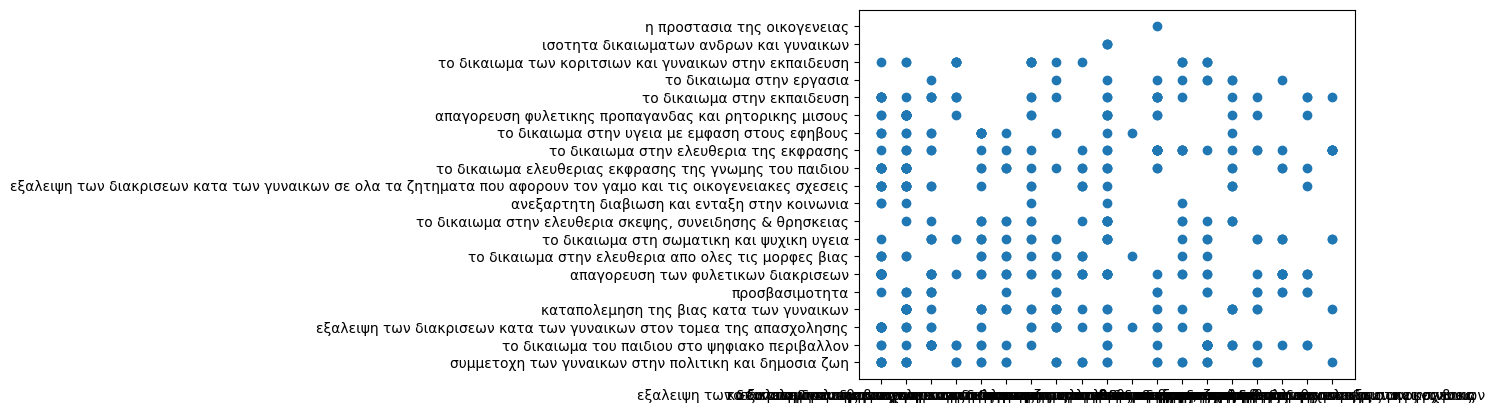

In [ ]:
first = np.array(new_df['first choice'])
second = np.array(new_df['second choice'])

plt.scatter(first, second)

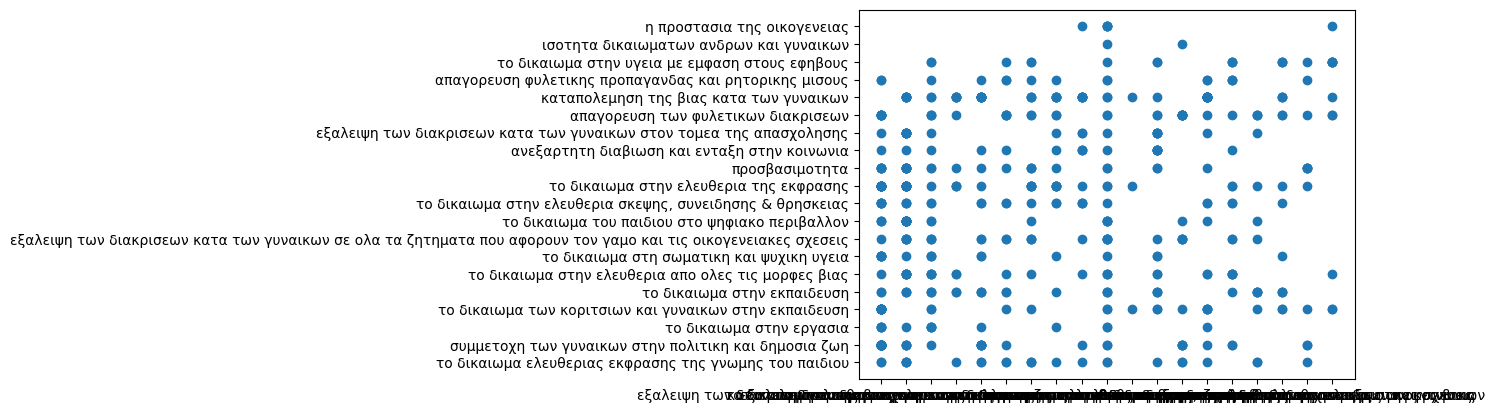

In [ ]:
first = np.array(new_df['first choice'])
third = np.array(new_df['third choice'])

plt.scatter(first, third)

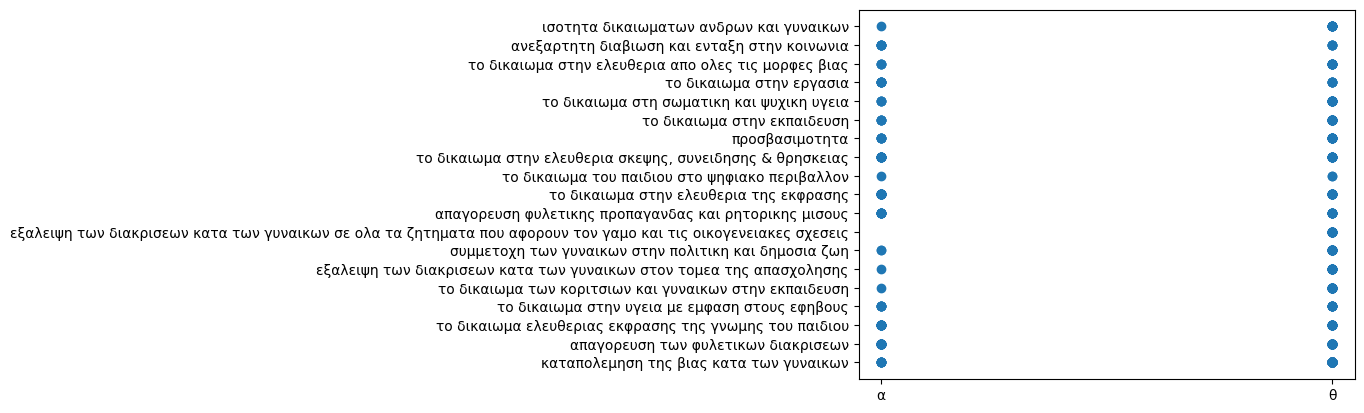

In [ ]:
gender = np.array(new_df['gender'])
choice = np.array(new_df['first choice'])

plt.scatter(gender, choice)

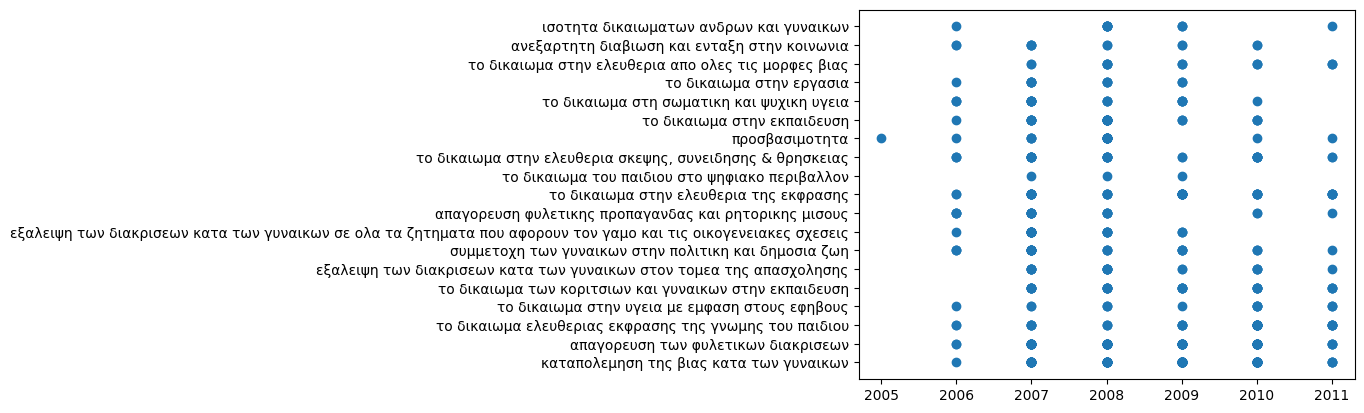

In [ ]:
first = np.array(new_df['first choice'])
year = np.array(new_df['birth year'])

plt.scatter(year, first)

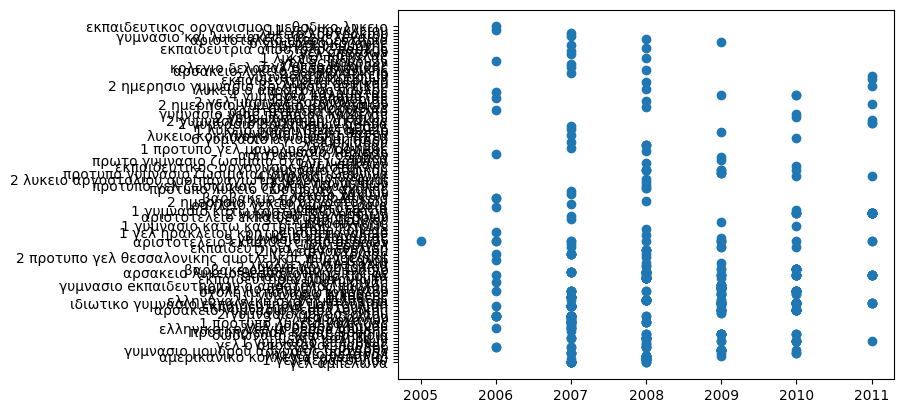

In [ ]:
school = np.array(new_df['school'])
year = np.array(new_df['birth year'])

plt.scatter(year, school)

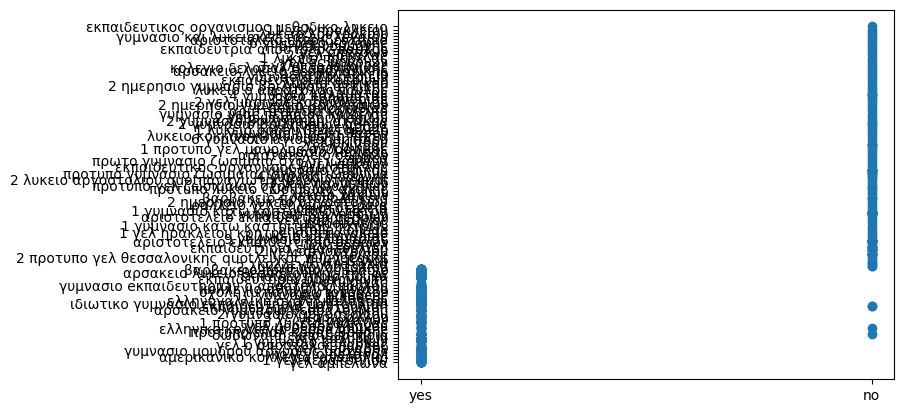

In [ ]:
school = np.array(new_df['school'])
team = np.array(new_df['team registration'])

plt.scatter(team, school)

# One hot encoding

Performs one hot encoding to the features

In [ ]:
def one_hotize(series):
  d = OrderedDict() # the dictionary is ordered so that the columns also stay ordered

  for value in series.unique(): # Iterates through the unique values of the series
    d[value] = list()

  for i in range(series.size): # performs one hot encoding for every unique value of the series
    temp = series[i]
    for key in d:
      if key == temp:
        d[key].append(1)
      else:
        d[key].append(0)

  return d

one_hot_dict = OrderedDict()

for i in range(new_df.shape[1]): # Iterates through the columns of the new (cleaned) dataframe
  column = new_df.iloc[:, i]
  one_hot_dict |= one_hotize(column)

one_hot_df = pd.DataFrame(one_hot_dict)

one_hot_df.to_csv('one hot frame.csv')

In [ ]:
one_hot_df

,α,θ,yes,no,2008,2007,2009,2010,2006,2011,...,2 γελ καβαλας,γελ σπετσων,εκπαιδευτρια αποστολος παυλος,5 γελ νσμυρνης,6 γυμνασιο κοζανης,αριστοτελειο εκπαιδευτηριο,γυμνασιο και λυκειακες ταξεις λεχαιου,λυκειο λουτρακιου,11 γελ ηρακλειου,εκπαιδευτικος οργανισμος μεθοδικο λυκειο
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
541,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
542,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Executing the algorithms

## Kmeans

In [ ]:
from sklearn.cluster import KMeans

one_hot_df.columns = one_hot_df.columns.astype(str)

kmeans_model = KMeans()
kmeans_model.fit(one_hot_df)
clusters = pd.Series(kmeans_model.labels_)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0      1
1      0
2      0
3      1
4      5
      ..
539    2
540    2
541    7
542    2
543    7
Length: 544, dtype: int32

In [ ]:
max = -1
for i in range(clusters.size):
  cluster = clusters[i]
  if cluster > max:
    max = cluster
max

7

Kmeans returned 7 different clusters.

## Dbscan

In [ ]:
from sklearn.cluster import DBSCAN

db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(one_hot_df)
labels = db_default.labels_
labels

array([-1, -1,  0, -1, -1, -1,  1,  2, -1,  1,  2,  0,  2, -1,  0, -1,  1,
       -1, -1,  3, -1, -1, -1,  3, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,  4,  4, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        5,  5, -1,  5, -1,  5,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  6, -1,  6, -1,  6, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  7, -1, -1, -1, -1, -1, -1, -1,  7,
       -1,  7, -1,  7, -1, -1,  8, -1, -1, -1, -1,  9, -1, -1, 10,  9,  9,
       -1, -1, -1,  9, 10, -1,  9, -1, -1,  8,  8, 10,  9, -1, -1, -1, -1,
       11, 11, -1, -1, 11, 11, 11, -1, 12, -1, 11, 11, 12, -1, 12, 12, 12,
       12, 12, 12, 12, 12

## Single link clustering

In [ ]:
import scipy.cluster.hierarchy as shc

shc.single(one_hot_df)

array([[  18.,   21.,    0.,    2.],
       [  19.,   23.,    0.,    2.],
       [  29.,  545.,    0.,    3.],
       ...,
       [ 540., 1083.,    2.,  542.],
       [ 541., 1084.,    2.,  543.],
       [ 542., 1085.,    2.,  544.]])

## Full link clustering

In [ ]:
shc.complete(one_hot_df)

array([[   2.        ,   11.        ,    0.        ,    2.        ],
       [   6.        ,    9.        ,    0.        ,    2.        ],
       [   7.        ,   10.        ,    0.        ,    2.        ],
       ...,
       [1076.        , 1083.        ,    2.82842712,  131.        ],
       [1067.        , 1084.        ,    2.82842712,  140.        ],
       [1082.        , 1085.        ,    3.16227766,  544.        ]])

## Hierarchical clustering

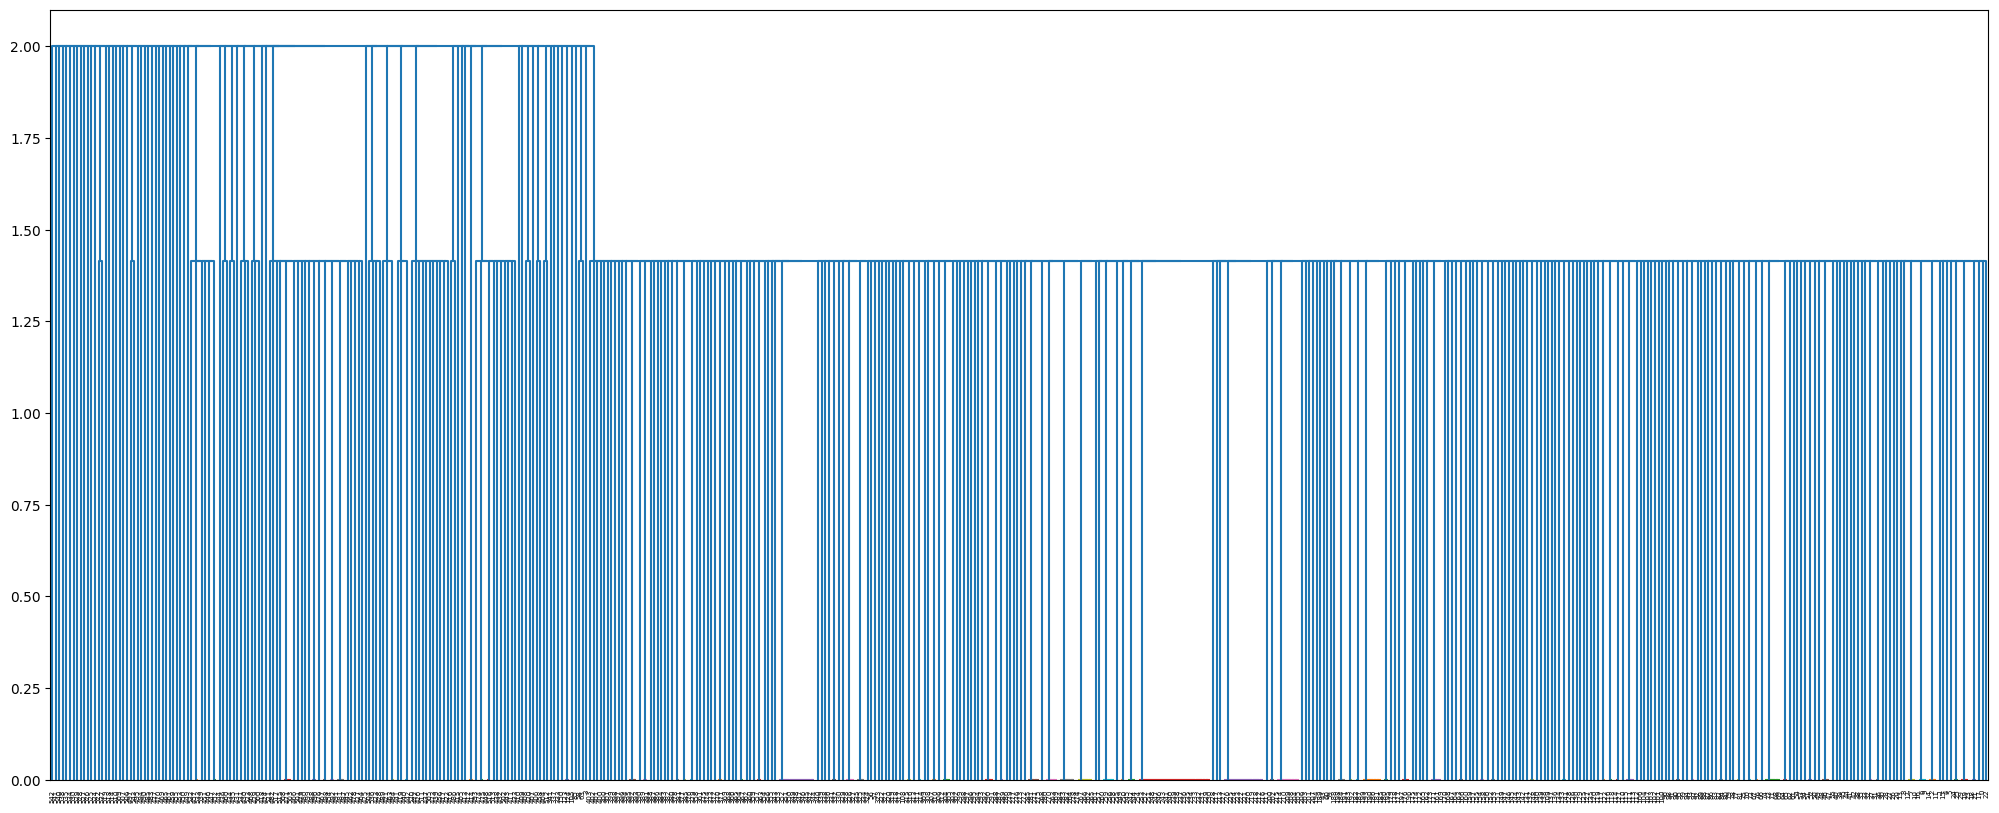

In [ ]:
hierarchical = shc.linkage(one_hot_df)
fig = plt.figure(figsize=(25, 10))
dn = shc.dendrogram(hierarchical)
plt.show()

k = 1

## Running kmeans with k

In [ ]:
from scipy.cluster.vq import kmeans, whiten

In [ ]:
kmeans(whiten(one_hot_df), k)

(array([[0.61701755, 1.62069944, 1.69873903, 0.58867194, 0.56319738,
         0.5745201 , 0.50344436, 0.48038446, 0.23294541, 0.27014497,
         0.04291411, 0.33875374, 0.2855012 , 0.21947564, 0.19536617,
         0.26222563, 0.19536617, 0.3520894 , 0.24159006, 0.17407766,
         0.30392347, 0.21947564, 0.22403806, 0.24159006, 0.24159006,
         0.1796053 , 0.16252721, 0.23294541, 0.1796053 , 0.06074567,
         0.105605  , 0.1796053 , 0.16252721, 0.12216944, 0.1141726 ,
         0.13684514, 0.12216944, 0.06074567, 0.14365897, 0.1564676 ,
         0.16252721, 0.04291411, 0.09631427, 0.06074567, 0.1564676 ,
         0.07446668, 0.22403806, 0.06074567, 0.19536617, 0.23294541,
         0.35537867, 0.21947564, 0.13684514, 0.105605  , 0.20529392,
         0.15018785, 0.09631427, 0.04291411, 0.15018785, 0.20529392,
         0.17407766, 0.15018785, 0.06074567, 0.06074567, 0.04291411,
         0.04291411, 0.1141726 , 0.0860663 , 0.0860663 , 0.04291411,
         0.15018785, 0.04291411, 0

## Running kmeans with double k

In [ ]:
kmeans(whiten(one_hot_df), 2*k)

## Running kmeans with k' >> 2*k

In [ ]:
kmeans(whiten(one_hot_df), 5*k)